<a href="https://colab.research.google.com/github/mmehtafenil/Car-Brand-Classification/blob/main/Car_Brand_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')
!unrar x '/content/drive/My Drive/Data Science Projects/Car Brand Classification/Datasets.rar' '/content/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Data Science Projects/Car Brand Classification/Datasets.rar


Would you like to replace the existing file /content/Dataset/Datasets/Test/audi/21.jpg
 12600 bytes, modified on 2020-07-01 10:35
with a new one
 12600 bytes, modified on 2020-07-01 10:35

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/Dataset/Datasets/Test/audi/21.jpg                     1%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/22.jpg                     1%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/23.jpg                     2%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/24.jpg                     4%  OK 
Extracting  /content/Dataset/Datasets/Test/audi/25.jpg                     5%  OK 
Ex

In [53]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Datasets/Train'
valid_path = '/content/Dataset/Datasets/Test'

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import *
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from glob import glob

In [55]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)


In [56]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [57]:
for layer in resnet.layers:
  layer.trainable = False

In [58]:
folders = glob('/content/Dataset/Datasets/Train/*')

In [59]:
len(folders)

3

In [60]:
x = Flatten()(resnet.output)

In [61]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(resnet.input, prediction)

In [62]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [63]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [64]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
training_set = train_datagen.flow_from_directory('/content/Dataset/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [66]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Datasets/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [67]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
2/2 [==============================] - 24s 15s/step - loss: 4.4925 - accuracy: 0.4583 - val_loss: 4.9768 - val_accuracy: 0.2414
Epoch 2/50
2/2 [==============================] - 19s 14s/step - loss: 4.0047 - accuracy: 0.4271 - val_loss: 5.2474 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 8.1302 - accuracy: 0.3542 - val_loss: 3.0134 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 5.0119 - accuracy: 0.4792 - val_loss: 3.6856 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 3.1936 - accuracy: 0.3646 - val_loss: 7.0693 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 4.9395 - accuracy: 0.3438 - val_loss: 2.3204 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 2.1950 - accuracy: 0.5521 - val_loss: 2.0547 - val_accuracy: 0.6034
Epoch 8/50
2/2 [===========

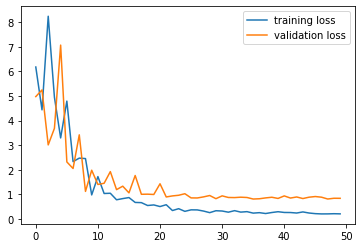

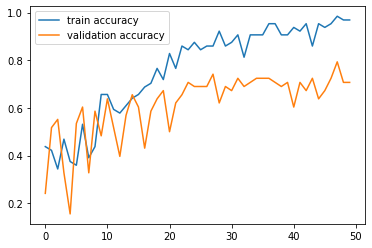

<Figure size 432x288 with 0 Axes>

In [71]:
plt.plot(r.history['loss'], label = 'training loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
from keras.models import load_model

model.save('model_resnet50.h5')

# New Section